In [15]:
import pandas as pd 
import json
import re 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
dataset = pd.read_csv('../data/pure_classes/false dilemma_keywords.csv')
cskg_dim = pd.read_csv('../data/cskg_nodes.csv')

In [16]:
dataset.columns

Index(['Unnamed: 0.7', 'Unnamed: 0.6', 'Unnamed: 0.5', 'Unnamed: 0.4',
       'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'source_article', 'updated_label', 'label', 'clean_prompt',
       'cleaner_prompt', 'choice 1', 'choice 2', 'choice_1_spacy',
       'choice_2_spacy', 'choice_1_yake', 'choice_2_yake', 'choice_1_keybert',
       'choice_2_keybert', 'choice_1', 'choice_2'],
      dtype='object')

In [17]:
def find_keywords(line): 
  findings = re.findall('\'(\w+\s+\w+)\'|\'(\w+)\'', line) 
 
  if len(findings)>=1: 
    keywords = [] 
    for fact in findings: 
      if len(fact[0])>=1:
        keywords.append(fact[0].lower()) 
      if len(fact[1])>=1:
        keywords.append(fact[1].lower()) 
    return keywords 
  return [] 



In [18]:
choice_1_keywords = [ find_keywords(keywords) for keywords in dataset['choice_1_yake']] 
choice_2_keywords = [ find_keywords(keywords) for keywords in dataset['choice_2_yake']] 

Lemmatizing the keywords to bring them to the root form

In [19]:
import spacy 
nlp = spacy.load('en_core_web_sm', disable = ['parser', 'ner']) 
ps = PorterStemmer() 


In [20]:
def lemmatize_phrases(phrase): 
 
 
  doc = nlp(phrase)
  return " ".join([token.lemma_ for token in doc])
  


In [21]:
choice_1_lemmatized, choice_2_lemmatized = [], [] 
for keyword_list in choice_1_keywords: 
  keyword_list_lemmatized = [] 
  for keyword in keyword_list: 
    keyword_list_lemmatized.append(lemmatize_phrases(keyword)) 
  choice_1_lemmatized.append(keyword_list_lemmatized) 

for keyword_list in choice_2_keywords: 
  keyword_list_lemmatized = [] 
  for keyword in keyword_list: 
    keyword_list_lemmatized.append(lemmatize_phrases(keyword)) 
  choice_2_lemmatized.append(keyword_list_lemmatized) 

In [14]:
dataset['choice_1_not_stemmed'] = choice_1_lemmatized 
dataset['choice_2_not_stemmed'] = choice_2_lemmatized 

dataset.to_csv('../data/pure_classes/false dilemma_keywords.csv', index=False)

['avoid eat', 'english', 'avoid', 'word', 'spanish translator']

Analysis of Words in the corpus

In [7]:
def collect_words_in_corpus(keyword_list): 
  word_list = set() 
  for keywords in keyword_list: 
    for word in keywords: 
      word_list.add(word) 
  return (" ".join(list(word_list)), list(word_list))

In [8]:
choice_1_word_list, choice_1_list = collect_words_in_corpus(choice_1_lemmatized)
choice_2_word_list, choice_2_list = collect_words_in_corpus(choice_2_lemmatized) 


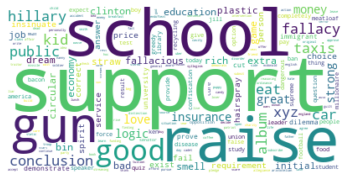

In [9]:
from wordcloud import WordCloud 
import matplotlib.pyplot as plt 
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(choice_1_word_list)
plt.imshow(word_cloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

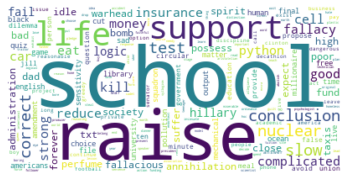

In [10]:
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(choice_2_word_list)
plt.imshow(word_cloud, interpolation='bilinear') 
plt.axis("off") 
plt.show()

Comparison with CSKG

In [39]:
cskg_dim.head(4)

,Unnamed: 0,node_1_label,relation,node_2_label
0,0,node1;label,relation,node2;label
1,1,0,/r/DefinedAs,empty set
2,2,0,/r/DefinedAs,first limit ordinal
3,3,0,/r/DefinedAs,number zero


In [47]:
print( 'false dilemma' in cskg_dim['node_1_label'].values) 

True


In [55]:
facts_choice_1, len_facts_choice_1 = [], [] 
for word in choice_1_list: 
  results = cskg_dim.loc[cskg_dim['node_1_label']== word] 
  facts_choice_1.append(results) 
  len_facts_choice_1.append(len(results)) 


In [56]:
facts_choice_2, len_facts_choice_2 = [], [] 
for word in choice_2_list: 
  results = cskg_dim.loc[cskg_dim['node_1_label']== word] 
  facts_choice_2.append(results) 
  len_facts_choice_2.append(len(results)) 


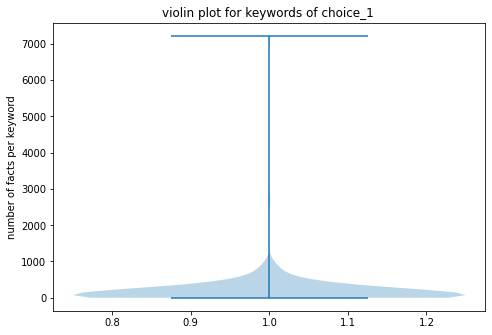

In [69]:
import matplotlib.pyplot as plt 
import numpy as np 

fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
plt.title('violin plot for keywords of choice_1 ')
bp = ax.violinplot([len_facts_choice_1]) 
ax.set_ylabel('number of facts per keyword')
plt.show()

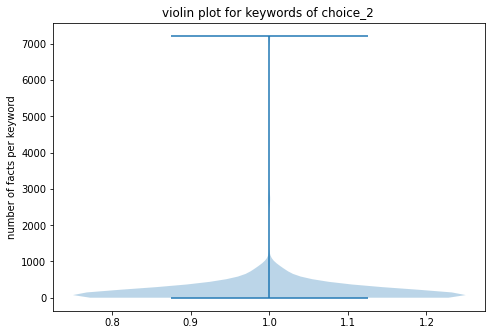

In [70]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1,1]) 
plt.title('violin plot for keywords of choice_2 ')
bp = ax.violinplot([len_facts_choice_2]) 
ax.set_ylabel('number of facts per keyword')
plt.show()

In [64]:
print("Average number of facts (node1:label, relation, node2:label) for choice_1: ", sum(len_facts_choice_1)/len(len_facts_choice_1))

Average number of facts (node1:label, relation, node2:label) for choice_1:  189.2


In [65]:
print("Average number of facts (node1:label, relation, node2:label) for choice_2: ", sum(len_facts_choice_2)/len(len_facts_choice_2))

Average number of facts (node1:label, relation, node2:label) for choice_2:  194.90595611285266
